In [18]:
import numpy as np
import matplotlib.pyplot as plt
curve_data = np.genfromtxt('data_2.csv', delimiter = ',')
x = curve_data[1:,0]
y = curve_data[1:,1]

x_squared = np.power(x,2)
x_matrix = np.transpose([x_squared, x, np.ones(np.shape(x))])
B = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_matrix), x_matrix)),
                  np.matmul(np.transpose(x_matrix), y))
y_estimate = np.matmul(x_matrix, np.transpose(B))
 

In [ ]:
##Least Square

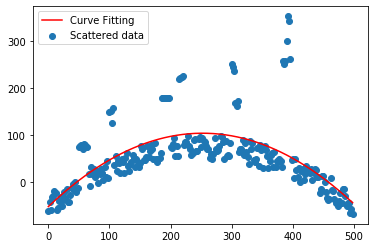

In [19]:
plt.scatter(x, y, label = 'Scattered data')
plt.plot(x, y_estimate, 'r', label = 'Curve Fitting')
plt.legend()
plt.show()

In [4]:
L=np.identity(3)

In [5]:
L[0,0]=0


In [6]:
Breg=np.matmul(np.linalg.inv((np.matmul(np.transpose(x_matrix), x_matrix))+L),np.matmul(np.transpose(x_matrix),y))


In [7]:
y_estimatereg = np.matmul(x_matrix, np.transpose(Breg))

In [ ]:
#Least square with reg

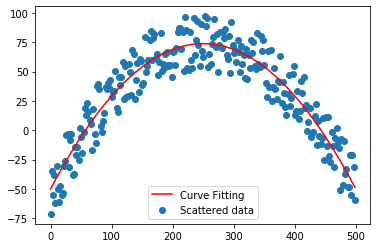

In [8]:
plt.scatter(x, y, label = 'Scattered data')
plt.plot(x, y_estimatereg , 'r', label = 'Curve Fitting')
plt.legend()
plt.show()

In [20]:
yn=np.reshape(y,(y.shape[0],1))

a=np.concatenate((x_matrix,yn),axis=1)



In [21]:
u, s, vh = np.linalg.svd(a, full_matrices=True)  

In [22]:
# a_tls = - V(1:n,1+n) / V(n+1,n+1)
V = vh.T
Vxy = V[:3,3]
Vyy = V[3,3]


In [23]:
a_tls = - Vxy / Vyy

In [24]:
VV=V[:,3].reshape(4,1)

In [25]:
Xtyt=np.matmul(np.matmul(a,VV),VV.T)

In [26]:
Xtyt=Xtyt[:,0:3]


In [27]:
y_tls=np.matmul((Xtyt+x_matrix),a_tls)



In [ ]:
#Total least squares

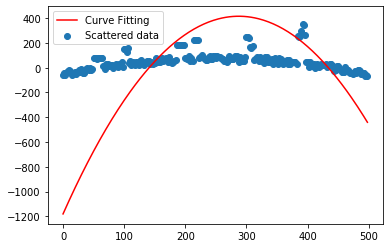

In [30]:
plt.scatter(x, y, label = 'Scattered data')
plt.plot(x, y+y_tls , 'r', label = 'Curve Fitting')
plt.legend()
plt.show()

In [124]:
x_matrix.dtype

dtype('float64')